In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np
import time

In [2]:
# URL for GET requests to retrieve vehicle data

url = "https://data.cms.gov/resource/tcsp-6e99.json?$limit=200000"

# Create a variable for and print the response object to the console to make sure we have a connection to the API
Response = requests.get(url)
print(Response)


<Response [200]>


In [3]:
# Create a variable to hold the response data in json format
Response_Data = Response.json()

# print(json.dumps(Response_Data, indent=4, sort_keys=True))


# Understanding the entire dataset - 196,325 observations

In [4]:
# Generate a DataFrame from the response data
DataFrame = pd.DataFrame(Response_Data)

# Display top 5 rows of dataframe for reference

DataFrame.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.7857,25823.71429,24057.39286
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.5625,20688.34375,19791.40625
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.54546,11811.18182,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.3333,19134,18154
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47059,8519.470588,6714.882353


In [5]:
# Display a statistical overview of the DataFrame for reference

DataFrame.describe()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
count,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325,196325
unique,563,3182,3077,3172,1905,51,2899,306,784,195067,190125,189584
top,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,100007,GOOD SAMARITAN HOSPITAL,601 E ROLLINS ST,CHICAGO,CA,77030,MA - Boston,11,36623.83333,7060,5900
freq,2838,388,532,388,1641,15216,594,4079,15019,4,6,7


In [6]:
# Check to see if there are any incomplete rows
DataFrame.count()

drg_definition               196325
provider_id                  196325
provider_name                196325
provider_street_address      196325
provider_city                196325
provider_state               196325
provider_zip_code            196325
hospital_referral_region     196325
total_discharges             196325
average_covered_charges      196325
average_total_payments       196325
average_medicare_payments    196325
dtype: int64

In [7]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs = len(DataFrame["drg_definition"].unique())
Unique_DRGs

563

In [8]:
# Calculate the Number of Unique Providers: 
Unique_Provider_count = len(DataFrame["provider_id"].unique())
Unique_Provider_count

3182

In [9]:
# Calculate the Total Number of Unique States in the DataFrame
Unique_State_Count = len(DataFrame["provider_state"].unique())
Unique_State_Count

51

In [10]:
# Calculate the Total Number of Unique Provider Zip Codes in the DataFrame
Unique_Provider_ZipCode_Count = len(DataFrame["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count

2899

In [11]:
# Calculate the Unique Number of hospital_referral_region_description in the DataFrame
Unique_Hospital_Referral_Region_count = len(DataFrame["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count

306

In [12]:
# Observe the DataTypes of each column
DataFrame.dtypes

drg_definition               object
provider_id                  object
provider_name                object
provider_street_address      object
provider_city                object
provider_state               object
provider_zip_code            object
hospital_referral_region     object
total_discharges             object
average_covered_charges      object
average_total_payments       object
average_medicare_payments    object
dtype: object

In [13]:
# Use pd.to_numeric() method to convert the datatype of the Discharge Count column
DataFrame['total_discharges'] = pd.to_numeric(DataFrame['total_discharges'])

# Use pd.to_numeric() method to convert the datatype of the Average Covered Charges column
DataFrame['average_covered_charges'] = pd.to_numeric(DataFrame['average_covered_charges'])

# Use pd.to_numeric() method to convert the datatype of the Average Medicare Payments column
DataFrame['average_medicare_payments'] = pd.to_numeric(DataFrame['average_medicare_payments'])

In [14]:
# Observe the updated DataTypes of each column
DataFrame.dtypes

drg_definition                object
provider_id                   object
provider_name                 object
provider_street_address       object
provider_city                 object
provider_state                object
provider_zip_code             object
hospital_referral_region      object
total_discharges               int64
average_covered_charges      float64
average_total_payments        object
average_medicare_payments    float64
dtype: object

In [15]:
# Calculate the Total Number of Discharges in the DataFrame
Discharge_Count = (DataFrame["total_discharges"].sum())
Discharge_Count

7382688

In [16]:
# Cacluate the average covered charges amount
Average_Covered_Charges = DataFrame["average_covered_charges"].mean()
Average_Covered_Charges

61166.151208427254

In [17]:
# Cacluate the max covered charge amount
Max_Covered_Charges = DataFrame["average_covered_charges"].max()
Max_Covered_Charges

3325523.355

In [18]:
# Cacluate the min covered charge amount
Min_Covered_Charges = DataFrame["average_covered_charges"].min()
Min_Covered_Charges

2644.777778

In [19]:
# Create a summary data frame to hold the Analysis Results

DRG_Analysis_df = pd.DataFrame([
    {"Unique DRGs": Unique_DRGs, 
     "Unique Providers": Unique_Provider_count, 
     "Unique Provider States": Unique_State_Count, 
     "Unique Provider Zip Codes": Unique_Provider_ZipCode_Count, 
     "Unique Regions": Unique_Hospital_Referral_Region_count,
     "Total Discharge Count": Discharge_Count,
     "Average Charge": Average_Covered_Charges,
     "Max Charge": Max_Covered_Charges,
     "Min Charge": Min_Covered_Charges
    }
])
DRG_Analysis_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,563,3182,51,2899,306,7382688,61166.151208,3325523.355,2644.777778


# Entire dataset summary

In [20]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df = DRG_Analysis_df

DRG_Analysis_Formatted_df["Average Charge"] = DRG_Analysis_df["Average Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Max Charge"] = DRG_Analysis_df["Max Charge"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df["Min Charge"] = DRG_Analysis_df["Min Charge"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df

,Unique DRGs,Unique Providers,Unique Provider States,Unique Provider Zip Codes,Unique Regions,Total Discharge Count,Average Charge,Max Charge,Min Charge
0,563,3182,51,2899,306,7382688,"$61,166.15","$3,325,523.35","$2,644.78"


In [21]:
# Filter the data so that only TN data is in the dataframe

DataFrame_TN = DataFrame.loc[DataFrame["provider_state"] == "TN", :]
DataFrame_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162142,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,33,21478.03030,6445.787879,5810.272727
162143,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,440001,UNICOI COUNTY MEMORIAL HOSPITAL,GREENWAY CIRCLE,ERWIN,TN,37650,TN - Johnson City,25,23957.88000,9588.52,8595.080000
162144,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,21,518677.85710,139743.1905,132983.761900
162145,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,25,261867.40000,68447.44,64716.840000
162146,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,21,75959.14286,28393.71429,27449.904760


In [22]:
# Display a statistical overview of the TN DataFrame for reference

DataFrame_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,4932.000000,4.932000e+03,4932.000000
mean,39.420316,5.485210e+04,10259.199905
std,61.416728,5.965389e+04,11359.757088
min,11.000000,5.628885e+03,1825.655172
25%,15.000000,2.272811e+04,4430.423986
50%,22.000000,3.694550e+04,6891.458442
75%,40.000000,6.294048e+04,11152.576390
max,1290.000000,1.156043e+06,200106.894700


In [23]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs): 
Unique_DRGs_TN = len(DataFrame_TN["drg_definition"].unique())
Unique_DRGs_TN

367

In [24]:
# Calculate the Number of Unique Providers in TN: 
Unique_Provider_count_TN = len(DataFrame_TN["provider_id"].unique())
Unique_Provider_count_TN

88

In [25]:
# Calculate the Unique Number of hospital_referral_region_description in TN 
Unique_Hospital_Referral_Region_count_TN = len(DataFrame_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_TN

8

In [26]:
# Calculate the Total Number of Discharges in TN 
Discharge_Count_TN = (DataFrame_TN["total_discharges"].sum())
Discharge_Count_TN


194421

In [27]:
# Cacluate the average covered charges amount in TN
Average_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].mean()
Average_Covered_Charges_TN


54852.10173436169

In [28]:
# Cacluate the max covered charge amount in TN
Max_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].max()
Max_Covered_Charges_TN


1156043.0

In [29]:
# Cacluate the min covered charge amount in TN
Min_Covered_Charges_TN = DataFrame_TN["average_covered_charges"].min()
Min_Covered_Charges_TN


5628.884615

In [30]:
# Calculate the Total Number of Unique Provider Zip Codes in TN 
Unique_Provider_ZipCode_Count_TN = len(DataFrame_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN


84

In [31]:
# Create a summary data frame to hold the DRG Analysis Results for TN

DRG_Analysis_df_TN = pd.DataFrame([
    {"Unique DRGs in TN": Unique_DRGs_TN, 
     "Unique Providers in TN": Unique_Provider_count_TN, 
     "Unique Provider Zip Codes in TN": Unique_Provider_ZipCode_Count_TN, 
     "Unique Regions in TN": Unique_Hospital_Referral_Region_count_TN,
     "Total Discharge Count in TN": Discharge_Count_TN,
     "Average Charge in TN": Average_Covered_Charges_TN,
     "Max Charge in TN": Max_Covered_Charges_TN,
     "Min Charge in TN": Min_Covered_Charges_TN
    }
])
DRG_Analysis_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,367,88,84,8,194421,54852.101734,1156043.0,5628.884615


In [32]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN = DRG_Analysis_df_TN

DRG_Analysis_Formatted_df_TN["Average Charge in TN"] = DRG_Analysis_df_TN["Average Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Max Charge in TN"] = DRG_Analysis_df_TN["Max Charge in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN["Min Charge in TN"] = DRG_Analysis_df_TN["Min Charge in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN

,Unique DRGs in TN,Unique Providers in TN,Unique Provider Zip Codes in TN,Unique Regions in TN,Total Discharge Count in TN,Average Charge in TN,Max Charge in TN,Min Charge in TN
0,367,88,84,8,194421,"$54,852.10","$1,156,043.00","$5,628.88"


In [33]:
# Filter the data so that only TN - Nashville data is in the dataframe

DataFrame_TN_Nashville = DataFrame.loc[DataFrame["hospital_referral_region"] == "TN - Nashville", :]

DataFrame_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
70614,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,20,30361.60000,7464.9,6788.650000
70615,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,43,28130.44186,7269.744186,6345.860465
70616,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,21,22967.47619,6292.428571,5408.952381
70617,192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,15,14440.66667,4847.2,3794.600000
70618,194 - SIMPLE PNEUMONIA & PLEURISY W CC,180004,OWENSBORO HEALTH MUHLENBERG COMMUNITY HOSPITAL,440 HOPKINSVILLE STREET,GREENVILLE,KY,42345,TN - Nashville,30,23082.80000,6129.7,5067.666667


In [34]:
# Display a statistical overview of the TN - Nashville DataFrame for reference

DataFrame_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,2143.000000,2143.000000,2143.000000
mean,36.260383,54810.476833,10046.600512
std,50.269408,60296.464567,11364.254846
min,11.000000,5628.884615,1839.666667
25%,14.000000,23715.381820,4419.915967
50%,22.000000,37304.166670,6650.317460
75%,38.000000,62987.555555,10963.579490
max,790.000000,963475.809500,195748.270300


In [35]:
# Calculate the Number of Unique Diagnosis Related Groups (DRGs) in TN - Nashville
Unique_DRGs_TN_Nashville = len(DataFrame_TN_Nashville["drg_definition"].unique())
Unique_DRGs_TN_Nashville

308

In [36]:
# Calculate the Number of Unique Providers in TN - Nashville
Unique_Provider_count_TN_Nashville = len(DataFrame_TN_Nashville["provider_id"].unique())
Unique_Provider_count_TN_Nashville

41

In [37]:
# Calculate the Total Number of Discharges in TN - Nashville
Discharge_Count_TN_Nashville = (DataFrame_TN_Nashville["total_discharges"].sum())
Discharge_Count_TN_Nashville

77706

In [38]:
# Cacluate the average covered charges amount in TN - Nashville
Average_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_TN_Nashville

54810.47683325669

In [39]:
# Cacluate the max covered charge amount in TN - Nashville
Max_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_TN_Nashville

963475.8095

In [40]:
# Cacluate the min covered charge amount in TN - Nashville
Min_Covered_Charges_TN_Nashville = DataFrame_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_TN_Nashville

5628.884615

In [41]:
# Calculate the Total Number of Unique Provider Zip Codes in TN - Nashville
Unique_Provider_ZipCode_Count_TN_Nashville = len(DataFrame_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_TN_Nashville

40

In [42]:
# Create a summary data frame to hold the DRG Analysis Results for TN - Nashville

DRG_Analysis_df_TN_Nashville = pd.DataFrame([
    {"Unique DRGs in Nashville": Unique_DRGs_TN_Nashville, 
     "Unique Providers in Nashville": Unique_Provider_count_TN_Nashville, 
     "Unique Provider Zip Codes in Nashville": Unique_Provider_ZipCode_Count_TN_Nashville, 
     "Total Discharge Count in Nashville": Discharge_Count_TN_Nashville,
     "Average Charge in Nashville": Average_Covered_Charges_TN_Nashville,
     "Max Charge in Nashville": Max_Covered_Charges_TN_Nashville,
     "Min Charge in Nashville": Min_Covered_Charges_TN_Nashville
    }
])
DRG_Analysis_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,308,41,40,77706,54810.476833,963475.8095,5628.884615


In [43]:
# Give the displayed data cleaner formatting

DRG_Analysis_Formatted_df_TN_Nashville = DRG_Analysis_df_TN_Nashville

DRG_Analysis_Formatted_df_TN_Nashville["Average Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Average Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Max Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Max Charge in Nashville"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_TN_Nashville["Min Charge in Nashville"] = DRG_Analysis_df_TN_Nashville["Min Charge in Nashville"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_TN_Nashville

,Unique DRGs in Nashville,Unique Providers in Nashville,Unique Provider Zip Codes in Nashville,Total Discharge Count in Nashville,Average Charge in Nashville,Max Charge in Nashville,Min Charge in Nashville
0,308,41,40,77706,"$54,810.48","$963,475.81","$5,628.88"


In [44]:
# Filter the data so that only a specific diagnosis is in the dataframe

DataFrame_drg_HEART_FAILURE = DataFrame.loc[(DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC") | (DataFrame["drg_definition"] == "292 - HEART FAILURE & SHOCK W CC") | (DataFrame["drg_definition"] == "293 - HEART FAILURE & SHOCK W/O CC/MCC"), :]

DataFrame_drg_HEART_FAILURE.head(50)

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
64,291 - HEART FAILURE & SHOCK W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,371,34642.048520,7771.625337,6965.857143
65,292 - HEART FAILURE & SHOCK W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,58,22885.724140,5778,4245.586207
66,293 - HEART FAILURE & SHOCK W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,22,15254.636360,3758.545455,2754.363636
181,291 - HEART FAILURE & SHOCK W MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,89,18208.898880,8220.404494,6905.460674
182,292 - HEART FAILURE & SHOCK W CC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,45,13050.777780,5264.644444,4336.822222
183,293 - HEART FAILURE & SHOCK W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,19,9805.052632,3796.789474,2760.789474
277,291 - HEART FAILURE & SHOCK W MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,238,33568.659660,7310.012605,6292.197479
278,292 - HEART FAILURE & SHOCK W CC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,33,21717.909090,4864.757576,3792.272727
279,293 - HEART FAILURE & SHOCK W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,22,12660.454550,3455.090909,2302.181818
349,292 - HEART FAILURE & SHOCK W CC,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,14,9964.428571,5174.857143,4426.857143


In [45]:
# Display a statistical overview of the HEART FAILURE DIAGNOSIS DataFrame for reference

DataFrame_drg_HEART_FAILURE.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,6571.000000,6571.000000,6571.000000
mean,75.567950,31928.292451,6900.805294
std,92.766103,20332.138867,3060.912024
min,11.000000,3889.916667,2149.173913
25%,20.000000,17992.778720,4687.568462
50%,39.000000,26392.937740,6559.305195
75%,92.000000,39703.710230,8440.377072
max,1389.000000,175171.472100,43072.833330


In [46]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS
Unique_Provider_count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["provider_id"].unique())
Unique_Provider_count_drg_HEART_FAILURE

2813

In [47]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE PROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE

306

In [48]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS in the DataFrame
Discharge_Count_drg_HEART_FAILURE = (DataFrame_drg_HEART_FAILURE["total_discharges"].sum())
Discharge_Count_drg_HEART_FAILURE

496557

In [49]:
# Cacluate the average covered charges for DRG HEART_FAILURE DIAGNOSIS
Average_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE

31928.292451481117

In [50]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE DIAGNOSIS
Max_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["average_covered_charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE

175171.4721

In [51]:
# Cacluate the min covered charge amount for DRG HEART_FAILURE DIAGNOSIS
Min_Covered_Charges_drg_HEART_FAILURE = DataFrame_drg_HEART_FAILURE["average_covered_charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE

3889.916667

In [52]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE = len(DataFrame_drg_HEART_FAILURE["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE

2639

In [53]:
# Create a summary data frame to hold the DRG HEART_FAILURE DIAGNOSIS Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS": Unique_Provider_count_drg_HEART_FAILURE, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE, 
     "Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS": Discharge_Count_drg_HEART_FAILURE,
     "Average Charge for DRG HEART_FAILURE DIAGNOSIS": Average_Covered_Charges_drg_HEART_FAILURE,
     "Max Charge for DRG HEART_FAILURE DIAGNOSIS": Max_Covered_Charges_drg_HEART_FAILURE,
     "Min Charge for DRG HEART_FAILURE DIAGNOSIS": Min_Covered_Charges_drg_HEART_FAILURE
    }
])
DRG_Analysis_df_drg_HEART_FAILURE

,Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS,Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS,Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS,Average Charge for DRG HEART_FAILURE DIAGNOSIS,Max Charge for DRG HEART_FAILURE DIAGNOSIS,Min Charge for DRG HEART_FAILURE DIAGNOSIS
0,2813,2639,496557,31928.292451,175171.4721,3889.916667


In [54]:
# Give the displayed data to hold the DRG HEART_FAILURE DIAGNOSIS Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE = DRG_Analysis_df_drg_HEART_FAILURE

DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEART_FAILURE["Average Charge for DRG HEART_FAILURE DIAGNOSIS"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEART_FAILURE["Max Charge for DRG HEART_FAILURE DIAGNOSIS"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE DIAGNOSIS"] = DRG_Analysis_df_drg_HEART_FAILURE["Min Charge for DRG HEART_FAILURE DIAGNOSIS"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE

,Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS,Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS,Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS,Average Charge for DRG HEART_FAILURE DIAGNOSIS,Max Charge for DRG HEART_FAILURE DIAGNOSIS,Min Charge for DRG HEART_FAILURE DIAGNOSIS
0,2813,2639,496557,"$31,928.29","$175,171.47","$3,889.92"


In [55]:
# Filter the data so that only a specific diagnosis HEART_FAILURE in TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN = DataFrame.loc[((DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC") | (DataFrame["drg_definition"] == "292 - HEART FAILURE & SHOCK W CC") | (DataFrame["drg_definition"] == "293 - HEART FAILURE & SHOCK W/O CC/MCC")) & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_HEART_FAILURE_TN.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162229,291 - HEART FAILURE & SHOCK W MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,673,24555.06092,8556.817236,7644.726597
162230,292 - HEART FAILURE & SHOCK W CC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,184,17962.25544,5784.646739,4785.364130
162231,293 - HEART FAILURE & SHOCK W/O CC/MCC,440002,JACKSON-MADISON COUNTY GENERAL HOSPITAL,620 SKYLINE DRIVE,JACKSON,TN,38301,TN - Jackson,72,13874.97222,4130.041667,3188.083333
162360,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,115,40689.97391,8482.582609,7160.634783
162361,292 - HEART FAILURE & SHOCK W CC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,30,31794.76667,5590.566667,4851.366667


In [56]:
# Display a statistical overview of the HEART_FAILURE DIAGNOSIS TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,169.000000,169.000000,169.000000
mean,72.017751,27570.451645,5775.157558
std,111.623915,12911.853609,2068.480829
min,11.000000,8360.666667,2297.875000
25%,18.000000,17813.932200,4155.774194
50%,31.000000,24555.060920,5413.364865
75%,74.000000,35767.783780,7342.950820
max,871.000000,62063.590430,15448.153850


In [57]:
# Calculate the Number of Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS in TN
Unique_Provider_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["provider_id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN

81

In [58]:
# Calculate the Unique Number of hospital_referral_region_description that serviced DRG HEART_FAILURE DIAGNOSIS in TN
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_HEART_FAILURE_TN

8

In [59]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS in TN
Discharge_Count_drg_HEART_FAILURE_TN = (DataFrame_drg_HEART_FAILURE_TN["total_discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN

12171

In [60]:
# Cacluate the average covered charges for DRG HEART_FAILURE DIAGNOSIS in TN
Average_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN

27570.451644792895

In [61]:
# Cacluate the min covered charge amount for DRG HEART_FAILURE DIAGNOSIS in TN
Min_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN

8360.666667

In [62]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE DIAGNOSIS in TN
Max_Covered_Charges_drg_HEART_FAILURE_TN = DataFrame_drg_HEART_FAILURE_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN

62063.59043

In [63]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS in TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN = len(DataFrame_drg_HEART_FAILURE_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN

79

In [64]:
# Create a summary data frame to hold the DRG HEART_FAILURE PROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS in TN": Unique_Provider_count_drg_HEART_FAILURE_TN, 
     "Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS in TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN, 
     "Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS in TN": Discharge_Count_drg_HEART_FAILURE_TN,
     "Average Charge for DRG HEART_FAILURE DIAGNOSIS in TN": Average_Covered_Charges_drg_HEART_FAILURE_TN,
     "Max Charge for DRG HEART_FAILURE DIAGNOSIS in TN": Max_Covered_Charges_drg_HEART_FAILURE_TN,
     "Min Charge for DRG HEART_FAILURE DIAGNOSIS in TN": Min_Covered_Charges_drg_HEART_FAILURE_TN
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN

,Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS in TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS in TN,Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS in TN,Average Charge for DRG HEART_FAILURE DIAGNOSIS in TN,Max Charge for DRG HEART_FAILURE DIAGNOSIS in TN,Min Charge for DRG HEART_FAILURE DIAGNOSIS in TN
0,81,79,12171,27570.451645,62063.59043,8360.666667


In [65]:
# Give the displayed data to hold the DRG HEART_FAILURE DIAGNOSIS in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN = DRG_Analysis_df_drg_HEART_FAILURE_TN

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Average Charge for DRG HEART_FAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Average Charge for DRG HEART_FAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Max Charge for DRG HEART_FAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Max Charge for DRG HEART_FAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN["Min Charge for DRG HEART_FAILURE DIAGNOSIS in TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN["Min Charge for DRG HEART_FAILURE DIAGNOSIS in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN

,Unique Providers that serviced DRG HEART_FAILURE DIAGNOSIS in TN,Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS in TN,Total Number of Discharges for DRG HEART_FAILURE DIAGNOSIS in TN,Average Charge for DRG HEART_FAILURE DIAGNOSIS in TN,Max Charge for DRG HEART_FAILURE DIAGNOSIS in TN,Min Charge for DRG HEART_FAILURE DIAGNOSIS in TN
0,81,79,12171,"$27,570.45","$62,063.59","$8,360.67"


In [66]:
# Store the Average Cost Data for the specific diagnosis (HEART_FAILURE) Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
HEART_FAILURE_data_grouped_by_Region_in_TN = DataFrame_drg_HEART_FAILURE_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df = HEART_FAILURE_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df.head(20)

,hospital_referral_region,average_covered_charges
0,AL - Huntsville,14372.071430
1,TN - Chattanooga,31158.980044
2,TN - Jackson,26847.115589
3,TN - Johnson City,31945.104750
4,TN - Kingsport,22214.209224
5,TN - Knoxville,22277.528670
6,TN - Memphis,34024.698589
7,TN - Nashville,28536.778275


In [67]:
# Create list to store data of the Regions in TN for the specific diagnosis - HEART_FAILURE

drg_HEART_FAILURE_TN_Region_List = []

for Region in HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_HEART_FAILURE_TN_Region_List:
        drg_HEART_FAILURE_TN_Region_List.append(Region)
        
drg_HEART_FAILURE_TN_Region_List

['AL - Huntsville',
 'TN - Chattanooga',
 'TN - Jackson',
 'TN - Johnson City',
 'TN - Kingsport',
 'TN - Knoxville',
 'TN - Memphis',
 'TN - Nashville']

In [68]:
# Create list to store data of the Average Charge by Region in TN for the HEART_FAILURE diagnosis

drg_HEART_FAILURE_TN_Average_Covered_Charge_List = []

for Cost in HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Average_Covered_Charge_List

[14372.07143,
 31158.98004416667,
 26847.115589285713,
 31945.10475,
 22214.209224285714,
 22277.528670194446,
 34024.69858899999,
 28536.77827538356]

In [69]:
# Create a DataFrame of the Average Cost by Region in TN for the HEART_FAILURE diagnosis by merging the lists
Average_Cost_of_HEART_FAILURE_per_Region_TN = pd.DataFrame({
    "DRG": "HEART_FAILURE DIAGNOSIS",
    "Hospital Referral Region": drg_HEART_FAILURE_TN_Region_List,
    "Average Cost": drg_HEART_FAILURE_TN_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Region_TN

,DRG,Hospital Referral Region,Average Cost
0,HEART_FAILURE DIAGNOSIS,AL - Huntsville,14372.071430
1,HEART_FAILURE DIAGNOSIS,TN - Chattanooga,31158.980044
2,HEART_FAILURE DIAGNOSIS,TN - Jackson,26847.115589
3,HEART_FAILURE DIAGNOSIS,TN - Johnson City,31945.104750
4,HEART_FAILURE DIAGNOSIS,TN - Kingsport,22214.209224
5,HEART_FAILURE DIAGNOSIS,TN - Knoxville,22277.528670
6,HEART_FAILURE DIAGNOSIS,TN - Memphis,34024.698589
7,HEART_FAILURE DIAGNOSIS,TN - Nashville,28536.778275


Text(0.5, 0, 'Hospital Referral Region to TN')

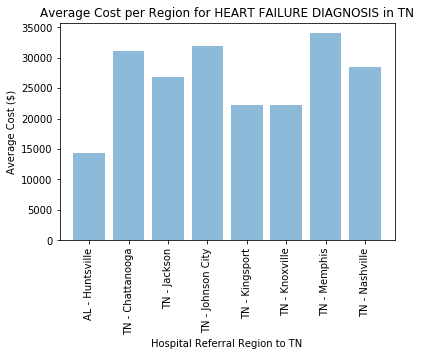

In [70]:
# Create a Bar Chart of the Average Cost per Region for HEART_FAILURE DIAGNOSIS in TN

drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values = drg_HEART_FAILURE_TN_Average_Covered_Charge_List
drg_HEART_FAILURE_TN_Region_List_Values = drg_HEART_FAILURE_TN_Region_List
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Region_List))

plt.bar(x_axis, drg_HEART_FAILURE_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_HEART_FAILURE_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for HEART FAILURE DIAGNOSIS in TN")
plt.ylabel("Average Cost ($)")
plt.xlabel ("Hospital Referral Region to TN")

In [114]:
# Filter the data so that only HEART_FAILURE diagnosis in Nashville TN is in the dataframe

DataFrame_drg_HEART_FAILURE_TN_Nashville = DataFrame.loc[((DataFrame["drg_definition"] == "291 - HEART FAILURE & SHOCK W MCC") | (DataFrame["drg_definition"] == "292 - HEART FAILURE & SHOCK W CC") | (DataFrame["drg_definition"] == "293 - HEART FAILURE & SHOCK W/O CC/MCC")) & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_HEART_FAILURE_TN_Nashville.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162360,291 - HEART FAILURE & SHOCK W MCC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,115,40689.97391,8482.582609,7160.634783
162361,292 - HEART FAILURE & SHOCK W CC,440003,SUMNER REGIONAL MEDICAL CENTER,555 HARTSVILLE PIKE,GALLATIN,TN,37066,TN - Nashville,30,31794.76667,5590.566667,4851.366667
162440,291 - HEART FAILURE & SHOCK W MCC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,134,55289.66418,8825.850746,7673.335821
162441,292 - HEART FAILURE & SHOCK W CC,440006,TRISTAR SKYLINE MEDICAL CENTER,3441 DICKERSON PIKE,NASHVILLE,TN,37207,TN - Nashville,25,40611.16000,6155.6,5188.520000
162500,291 - HEART FAILURE & SHOCK W MCC,440007,UNITY MEDICAL CENTER,481 INTERSTATE DRIVE,MANCHESTER,TN,37355,TN - Nashville,14,12259.78571,9123.142857,8471.142857


In [115]:
# Display a statistical overview of the HEART_FAILURE diagnosis in Nashville TN DataFrame for reference

DataFrame_drg_HEART_FAILURE_TN_Nashville.describe()

,total_discharges,average_covered_charges,average_medicare_payments
count,73.000000,73.000000,73.000000
mean,58.767123,28536.778275,5895.127308
std,68.117244,13362.537959,2044.725911
min,11.000000,8360.666667,2706.000000
25%,18.000000,17813.932200,4615.000000
50%,30.000000,26987.671880,5209.888889
75%,64.000000,36322.454550,7493.050848
max,318.000000,62063.590430,12523.272730


In [73]:
# Calculate the Number of Unique Providers that diagnosed DRG HEART_FAILURE in Nashville TN
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville

34

In [74]:
# Calculate the Total Number of Discharges for DRG HEART_FAILURE diagnosis in Nasvhville TN
Discharge_Count_drg_HEART_FAILURE_TN_Nashville = (DataFrame_drg_HEART_FAILURE_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_HEART_FAILURE_TN_Nashville

4290

In [75]:
# Cacluate the average covered charges for DRG HEART_FAILURE diagnosis in Nashville TN
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

28536.77827538356

In [76]:
# Cacluate the min covered charge amount for DRG HEART_FAILURE diagnosis in Nashville TN
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

8360.666667

In [77]:
# Cacluate the max covered charge amount for DRG HEART_FAILURE diagnosis in Nashville TN
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville

62063.59043

In [78]:
# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG HEART_FAILURE DIAGNOSIS in Nashville TN
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville = len(DataFrame_drg_HEART_FAILURE_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville

34

In [79]:
# Create a summary data frame to hold the DRG HEART_FAILURE diagnosis in Nashville TN Analysis Results

DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN": Unique_Provider_count_drg_HEART_FAILURE_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN": Unique_Provider_ZipCode_Count_drg_HEART_FAILURE_TN_Nashville, 
     "Total Number of Discharges for DRG HEART FAILURE DIAGNOSIS in Nashville TN": Discharge_Count_drg_HEART_FAILURE_TN_Nashville,
     "Average Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN": Average_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Max Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN": Max_Covered_Charges_drg_HEART_FAILURE_TN_Nashville,
     "Min Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN": Min_Covered_Charges_drg_HEART_FAILURE_TN_Nashville
    }
])
DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville

,Unique Providers that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN,Unique Provider Zip Codes that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN,Total Number of Discharges for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Average Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Max Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Min Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN
0,34,34,4290,28536.778275,62063.59043,8360.666667


In [80]:
# Give the displayed data to hold the DRG HEART_FAILURE diagnosis in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Average Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Average Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Max Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Max Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville["Min Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"] = DRG_Analysis_df_drg_HEART_FAILURE_TN_Nashville["Min Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_HEART_FAILURE_TN_Nashville

,Unique Providers that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN,Unique Provider Zip Codes that serviced DRG HEART FAILURE DIAGNOSIS in Nashville TN,Total Number of Discharges for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Average Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Max Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN,Min Charge for DRG HEART FAILURE DIAGNOSIS in Nashville TN
0,34,34,4290,"$28,536.78","$62,063.59","$8,360.67"


In [121]:
# Store the Average Cost Data for the specific diagnosis (HEART_FAILURE) Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
HEART_FAILURE_data_grouped_by_Region_in_TN_Nashville = DataFrame_drg_HEART_FAILURE_TN_Nashville.groupby(["provider_name"])

# Convert to DataFrame

HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_Nashville_df = HEART_FAILURE_data_grouped_by_Region_in_TN_Nashville["average_covered_charges"].sum().reset_index()

# Preview DataFrame

HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_Nashville_df.head(90)

,provider_name,average_covered_charges
0,COOKEVILLE REGIONAL MEDICAL CENTER,36179.827166
1,CUMBERLAND MEDICAL CENTER,43160.371930
2,HOUSTON COUNTY COMMUNITY HOSPITAL,8360.666667
3,LIVINGSTON REGIONAL HOSPITAL,75833.017050
4,MAURY REGIONAL HOSPITAL,33241.265920
5,METRO NASHVILLE GENERAL HOSPITAL,19984.454550
6,NORTHCREST MEDICAL CENTER,43082.777780
7,PERRY COMMUNITY HOSPITAL,11096.391300
8,SAINT THOMAS DEKALB HOSPITAL,18180.875000
9,SAINT THOMAS HIGHLANDS HOSPITAL,22222.838710


In [122]:
# Create list to store data of the Providers in Nashville for the specific diagnosis - HEART_FAILURE

drg_HEART_FAILURE_TN_Nashville_ProviderList = []

for Provider in HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_Nashville_df["provider_name"]:
    if Provider not in drg_HEART_FAILURE_TN_Nashville_ProviderList:
        drg_HEART_FAILURE_TN_Nashville_ProviderList.append(Provider)
        
drg_HEART_FAILURE_TN_Nashville_ProviderList

['COOKEVILLE REGIONAL MEDICAL CENTER',
 'CUMBERLAND MEDICAL CENTER',
 'HOUSTON COUNTY COMMUNITY HOSPITAL',
 'LIVINGSTON REGIONAL HOSPITAL',
 'MAURY REGIONAL HOSPITAL',
 'METRO NASHVILLE GENERAL HOSPITAL',
 'NORTHCREST MEDICAL CENTER',
 'PERRY COMMUNITY HOSPITAL',
 'SAINT THOMAS DEKALB HOSPITAL',
 'SAINT THOMAS HIGHLANDS HOSPITAL',
 'SAINT THOMAS MIDTOWN HOSPITAL',
 'SAINT THOMAS RIVER PARK HOSPITAL',
 'SAINT THOMAS RUTHERFORD HOSPITAL',
 'SAINT THOMAS STONES RIVER HOSPITAL',
 'SAINT THOMAS WEST HOSPITAL',
 'SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM LAWRENCE',
 'SOUTHERN TENNESSEE REGIONAL HEALTH SYSTEM PULASKI',
 'SOUTHERN TENNESSEE REGIONAL HLTH SYSTEM WINCHESTER',
 'SUMNER REGIONAL MEDICAL CENTER',
 'TENNOVA HEALTHCARE - JAMESTOWN',
 'TENNOVA HEALTHCARE-CLARKSVILLE',
 'TENNOVA HEALTHCARE-HARTON',
 'TENNOVA HEALTHCARE-LEBANON',
 'TENNOVA HEALTHCARE-SHELBYVILLE',
 'TRISTAR CENTENNIAL MEDICAL CENTER',
 'TRISTAR HENDERSONVILLE MEDICAL CENTER',
 'TRISTAR HORIZON MEDICAL CENTER',
 'TRISTAR

In [123]:
# Create list to store data of the Average Charge in Nashville for the specific diagnosis - HEART_FAILURE

drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List = []

for Cost in HEART_FAILURE_Avg_Charge_data_grouped_by_Region_in_TN_Nashville_df["average_covered_charges"]:
    if Cost not in drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List:
        drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List

[36179.827165999995,
 43160.37193,
 8360.666667,
 75833.01705,
 33241.265920000005,
 19984.45455,
 43082.777780000004,
 11096.3913,
 18180.875,
 22222.83871,
 69064.10892,
 44223.82573,
 67873.7976,
 13859.45455,
 72863.82889,
 62902.60919,
 21561.1579,
 81857.40584,
 72484.74058,
 60262.80769,
 111302.07754,
 108334.68775,
 91423.38235999999,
 67841.01186,
 140602.09043,
 108101.09404,
 84453.02119,
 95900.82418,
 69050.21768999999,
 74914.88889,
 128224.73402999999,
 22402.202380000002,
 72775.8137,
 29562.5451]

In [119]:
# Create a DataFrame of the Average Cost of HEART_FAILURE per Provider in Nashville by merging the lists
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df = pd.DataFrame ({
    "DRG": "HEART FAILURE DIAGNOSIS",
    "Provider": drg_HEART_FAILURE_TN_Nashville_ProviderList,
    "Average Cost": drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_HEART_FAILURE_per_Provider_Nashvile_df

,DRG,Provider,Average Cost
0,HEART FAILURE DIAGNOSIS,COOKEVILLE REGIONAL MEDICAL CENTER,12059.942389
1,HEART FAILURE DIAGNOSIS,CUMBERLAND MEDICAL CENTER,14386.790643
2,HEART FAILURE DIAGNOSIS,HOUSTON COUNTY COMMUNITY HOSPITAL,8360.666667
3,HEART FAILURE DIAGNOSIS,LIVINGSTON REGIONAL HOSPITAL,25277.672350
4,HEART FAILURE DIAGNOSIS,MAURY REGIONAL HOSPITAL,16620.632960
5,HEART FAILURE DIAGNOSIS,METRO NASHVILLE GENERAL HOSPITAL,19984.454550
6,HEART FAILURE DIAGNOSIS,NORTHCREST MEDICAL CENTER,21541.388890
7,HEART FAILURE DIAGNOSIS,PERRY COMMUNITY HOSPITAL,11096.391300
8,HEART FAILURE DIAGNOSIS,SAINT THOMAS DEKALB HOSPITAL,18180.875000
9,HEART FAILURE DIAGNOSIS,SAINT THOMAS HIGHLANDS HOSPITAL,22222.838710


Text(0, 0.5, 'Average Cost ($)')

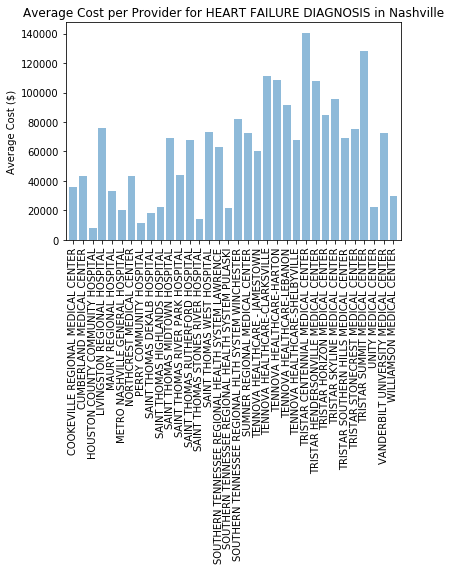

In [124]:
# Create a Bar Chart

AverageCostValue = drg_HEART_FAILURE_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_HEART_FAILURE_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_HEART_FAILURE_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Provider for HEART FAILURE DIAGNOSIS in Nashville")
plt.ylabel("Average Cost ($)")


In [ ]:
# Store the Average Cost Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_EXTRACRANIAL_Cost_for_data_grouped_by_State = DataFrame_drg_EXTRACRANIAL.groupby(['provider_state'])

# # Convert to DataFrame

Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df = Average_EXTRACRANIAL_Cost_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df.head()

In [ ]:
# Create list to store data of the States for the specific procedure

drg_EXTRACRANIAL_State_List = []

for State in Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_EXTRACRANIAL_State_List:
        drg_EXTRACRANIAL_State_List.append(State)
        
drg_EXTRACRANIAL_State_List

In [ ]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List = []

for Cost in Average_EXTRACRANIAL_Cost_for_data_grouped_by_State_df["average_covered_charges"]:
    if Cost not in drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List:
        drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List.append(Cost)
        
drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List

In [ ]:
# Create a DataFrame of the Average Cost by State for the specific procedure by merging the lists
Average_Cost_of_Extracranial_per_State = pd.DataFrame({
    "DRG": "039 - EXTRACRANIAL PROCEDURES W/O CC/MCC",
    "State": drg_EXTRACRANIAL_State_List,
    "Average Cost": drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List
})
Average_Cost_of_Extracranial_per_State

In [ ]:
# Create a Bar Chart of the Average Cost per State for EXTRACRANIAL PROCEDURES

drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List_Values = drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List
drg_EXTRACRANIAL_State_List_Values = drg_EXTRACRANIAL_State_List
x_axis = np.arange(len(drg_EXTRACRANIAL_State_List))

plt.bar(x_axis, drg_EXTRACRANIAL_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_EXTRACRANIAL_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per State for EXTRACRANIAL PROCEDURES")
plt.ylabel("Average Cost ($)")

In [ ]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
EXTRACRANIAL_data_grouped_by_Provider = DataFrame_drg_EXTRACRANIAL.groupby(['provider_name'])

# # Convert to DataFrame

EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df = EXTRACRANIAL_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()

In [ ]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df = EXTRACRANIAL_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df.head()

In [ ]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(EXTRACRANIAL_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], EXTRACRANIAL_Average_Cost_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Hospital EXTRACRANIAL Treatment Volume vs. Price")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Discharges")
plt.grid(True)

In [ ]:
# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB= DataFrame.loc[DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC", :]

DataFrame_drg_ALCOHOL_DRUG_REHAB.head()

# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB.describe()



In [ ]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in the DataFrame
Discharge_Count_drg_ALCOHOL_DRUG_REHAB= (DataFrame_drg_ALCOHOL_DRUG_REHAB["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB
# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB= DataFrame_drg_ALCOHOL_DRUG_REHAB["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB= len(DataFrame_drg_ALCOHOL_DRUG_REHAB["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB



In [ ]:
# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB= pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES": Discharge_Count_drg_ALCOHOL_DRUG_REHAB,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB


In [ ]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB= DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB



In [ ]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame.loc[(DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.head()



In [ ]:
# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES TN DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.describe()


In [ ]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN = (DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN


In [ ]:
# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN


In [ ]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN

In [ ]:
# Store the Average Cost Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
ALCOHOL_DRUG_REHAB_data_grouped_by_Region_in_TN = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df.head()


In [ ]:
# Create list to store data of the Regions in TN for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Region_List = []

for Region in ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_ALCOHOL_DRUG_REHAB_TN_Region_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Region_List.append(Region)
        
drg_ALCOHOL_DRUG_REHAB_TN_Region_List


In [ ]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List = []

for Cost in ALCOHOL_DRUG_REHAB_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Cost not in drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List.append(Cost)
        
drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List


In [ ]:
# Create a DataFrame of the Average Cost by Region in TN for the specific procedure by merging the lists
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_Region_TN = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "Region": drg_ALCOHOL_DRUG_REHAB_TN_Region_List,
    "Average Cost": drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List
})
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_Region_TN


In [ ]:
# Create a Bar Chart of the Average Cost per Region for ALCOHOL_DRUG_REHABPROCEDURES in TN

drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List_Values = drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List
drg_ALCOHOL_DRUG_REHAB_TN_Region_List_Values = drg_ALCOHOL_DRUG_REHAB_TN_Region_List
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_TN_Region_List))

plt.bar(x_axis, drg_ALCOHOL_DRUG_REHAB_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_ALCOHOL_DRUG_REHAB_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for ALCOHOL DRUG REHAB Treatment in TN")
plt.ylabel("Average Cost ($)")


In [ ]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville.head()


In [ ]:
# Display a statistical overview of the ALCOHOL_DRUG_REHABPROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville.describe()



In [ ]:
# Calculate the Number of Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Calculate the Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nasvhville TN
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = (DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the average covered charges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the min covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Cacluate the max covered charge amount for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = len(DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

# Create a summary data frame to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Unique_Provider_count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville, 
     "Total Number of Discharges for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Discharge_Count_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Average_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Max_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville,
     "Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN": Min_Covered_Charges_drg_ALCOHOL_DRUG_REHAB_TN_Nashville
    }
])
DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville


In [ ]:
# Give the displayed data to hold the DRG ALCOHOL_DRUG_REHABPROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Average Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Max Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["Min Charge for DRG ALCOHOL_DRUG_REHABPROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_ALCOHOL_DRUG_REHAB_TN_Nashville


In [ ]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["provider_name"]:
    if Provider not in drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList:
        drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList.append(Provider)
        
drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList


In [ ]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List = []

for Cost in DataFrame_drg_ALCOHOL_DRUG_REHAB_TN_Nashville["average_covered_charges"]:
    if Cost not in drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List:
        drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List


In [ ]:
# Create a DataFrame of the Average Cost of ALCOHOL_DRUG_REHABper Provider in Nashville by merging the lists
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "Provider": drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList,
    "Average Cost": drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_Provider_Nashvile_df


In [ ]:
# Create a Bar Chart

AverageCostValue = drg_ALCOHOL_DRUG_REHAB_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Provider for ALCOHOL DRUG REHAB Treatment in Nashville")
plt.ylabel("Average Cost ($)")


In [ ]:
# Store the Average Cost Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State = DataFrame_drg_ALCOHOL_DRUG_REHAB.groupby(['provider_state'])

# # Convert to DataFrame

Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State_df = Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State_df.head()


In [ ]:
# Create list to store data of the States for the specific procedure

drg_ALCOHOL_DRUG_REHAB_State_List = []

for State in Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_ALCOHOL_DRUG_REHAB_State_List:
        drg_ALCOHOL_DRUG_REHAB_State_List.append(State)
        
drg_ALCOHOL_DRUG_REHAB_State_List


In [ ]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List = []

for Cost in Average_ALCOHOL_DRUG_REHAB_Cost_for_data_grouped_by_State_df["average_covered_charges"]:
    if Cost not in drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List:
        drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List.append(Cost)
        
drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List


In [ ]:
# Create a DataFrame of the Average Cost by State for the specific procedure by merging the lists
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_State = pd.DataFrame({
    "DRG": "897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC",
    "State": drg_ALCOHOL_DRUG_REHAB_State_List,
    "Average Cost": drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List
})
Average_Cost_of_ALCOHOL_DRUG_REHAB_per_State


In [ ]:
# Create a Bar Chart of the Average Cost per State for ALCOHOL_DRUG_REHABPROCEDURES

drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List_Values = drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List
drg_ALCOHOL_DRUG_REHAB_State_List_Values = drg_ALCOHOL_DRUG_REHAB_State_List
x_axis = np.arange(len(drg_ALCOHOL_DRUG_REHAB_State_List))

plt.bar(x_axis, drg_ALCOHOL_DRUG_REHAB_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_ALCOHOL_DRUG_REHAB_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per State for ALCOHOL DRUG REHAB Treatment")
plt.ylabel("Average Cost ($)")


In [ ]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
ALCOHOL_DRUG_REHAB_data_grouped_by_Provider = DataFrame_drg_ALCOHOL_DRUG_REHAB.groupby(['provider_name'])

# # Convert to DataFrame

ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()


In [ ]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

ALCOHOL_DRUG_REHAB_Average_Cost_for_data_grouped_by_Provider_df = ALCOHOL_DRUG_REHAB_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

ALCOHOL_DRUG_REHAB_Average_Cost_for_data_grouped_by_Provider_df.head()


In [ ]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(ALCOHOL_DRUG_REHAB_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], ALCOHOL_DRUG_REHAB_Average_Cost_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Provider ALCOHOL DRUG_REHAB Treatment Volume vs Charge")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Discharges")
plt.grid(True)


In [ ]:
# Filter the data so that only a specific procedure is in the dataframe

DataFrame_drg_DRUG_POISONING= DataFrame.loc[DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC", :]

DataFrame_drg_DRUG_POISONING.head()


In [ ]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES DataFrame for reference

DataFrame_drg_DRUG_POISONING.describe()


In [ ]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES
Unique_Provider_count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG DRUG_POISONINGPROCEDURES in the DataFrame
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in the DataFrame
Discharge_Count_drg_DRUG_POISONING= (DataFrame_drg_DRUG_POISONING["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES
Average_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING
# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES
Max_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES
Min_Covered_Charges_drg_DRUG_POISONING= DataFrame_drg_DRUG_POISONING["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING= len(DataFrame_drg_DRUG_POISONING["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING= pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES": Unique_Provider_count_drg_DRUG_POISONING, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES": Discharge_Count_drg_DRUG_POISONING,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES": Average_Covered_Charges_drg_DRUG_POISONING,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES": Max_Covered_Charges_drg_DRUG_POISONING,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES": Min_Covered_Charges_drg_DRUG_POISONING
    }
])
DRG_Analysis_df_drg_DRUG_POISONING
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results with cleaner formatting



In [ ]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING= DRG_Analysis_df_drg_DRUG_POISONING

DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Average Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Average Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Max Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Max Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING["Min Charge for DRG DRUG_POISONINGPROCEDURES"] = DRG_Analysis_df_drg_DRUG_POISONING["Min Charge for DRG DRUG_POISONINGPROCEDURES"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING


In [ ]:
# Filter the data so that only a specific procedure in TN is in the dataframe

DataFrame_drg_DRUG_POISONING_TN = DataFrame.loc[(DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC") & (DataFrame["provider_state"] == "TN"), :]

DataFrame_drg_DRUG_POISONING_TN.head()


In [ ]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES TN DataFrame for reference

DataFrame_drg_DRUG_POISONING_TN.describe()


In [ ]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Provider_count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING_TN

# Calculate the Unique Number of hospital_referral_region_description that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["hospital_referral_region"].unique())
Unique_Hospital_Referral_Region_count_drg_DRUG_POISONING_TN

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN
Discharge_Count_drg_DRUG_POISONING_TN = (DataFrame_drg_DRUG_POISONING_TN["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING_TN

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES in TN
Average_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING_TN

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES in TN
Min_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING_TN

# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES in TN
Max_Covered_Charges_drg_DRUG_POISONING_TN = DataFrame_drg_DRUG_POISONING_TN["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING_TN

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN = len(DataFrame_drg_DRUG_POISONING_TN["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES in TN Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING_TN = pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in TN": Unique_Provider_count_drg_DRUG_POISONING_TN, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in TN": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in TN": Discharge_Count_drg_DRUG_POISONING_TN,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES in TN": Average_Covered_Charges_drg_DRUG_POISONING_TN,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES in TN": Max_Covered_Charges_drg_DRUG_POISONING_TN,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES in TN": Min_Covered_Charges_drg_DRUG_POISONING_TN
    }
])
DRG_Analysis_df_drg_DRUG_POISONING_TN


In [ ]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES in TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN = DRG_Analysis_df_drg_DRUG_POISONING_TN

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Average Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Average Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Max Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Max Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN["Min Charge for DRG DRUG_POISONINGPROCEDURES in TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN["Min Charge for DRG DRUG_POISONINGPROCEDURES in TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN


In [ ]:
# Store the Average Cost Data for the specific procedure Grouped by Region by splitting up the data into groups based upon 'Region'
# Filter the DataFrame down only to those columns to chart
DRUG_POISONING_data_grouped_by_Region_in_TN = DataFrame_drg_DRUG_POISONING_TN.groupby(['hospital_referral_region'])

# Convert to DataFrame

DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df = DRUG_POISONING_data_grouped_by_Region_in_TN[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df.head()


In [ ]:
# Create list to store data of the Regions in TN for the specific procedure

drg_DRUG_POISONING_TN_Region_List = []

for Region in DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df["hospital_referral_region"]:
    if Region not in drg_DRUG_POISONING_TN_Region_List:
        drg_DRUG_POISONING_TN_Region_List.append(Region)
        
drg_DRUG_POISONING_TN_Region_List


In [ ]:
# Create list to store data of the Average Charge by Region in TN for the specific procedure

drg_DRUG_POISONING_TN_Average_Covered_Charge_List = []

for Cost in DRUG_POISONING_Avg_Charge_data_grouped_by_Region_in_TN_df["average_covered_charges"]:
    if Cost not in drg_DRUG_POISONING_TN_Average_Covered_Charge_List:
        drg_DRUG_POISONING_TN_Average_Covered_Charge_List.append(Cost)
        
drg_DRUG_POISONING_TN_Average_Covered_Charge_List


In [ ]:
# Create a DataFrame of the Average Cost by Region in TN for the specific procedure by merging the lists
Average_Cost_of_DRUG_POISONING_per_Region_TN = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "Region": drg_DRUG_POISONING_TN_Region_List,
    "Average Cost": drg_DRUG_POISONING_TN_Average_Covered_Charge_List
})
Average_Cost_of_DRUG_POISONING_per_Region_TN


In [ ]:
# Create a Bar Chart of the Average Cost per Region for DRUG_POISONINGPROCEDURES in TN

drg_DRUG_POISONING_TN_Average_Covered_Charge_List_Values = drg_DRUG_POISONING_TN_Average_Covered_Charge_List
drg_DRUG_POISONING_TN_Region_List_Values = drg_DRUG_POISONING_TN_Region_List
x_axis = np.arange(len(drg_DRUG_POISONING_TN_Region_List))

plt.bar(x_axis, drg_DRUG_POISONING_TN_Average_Covered_Charge_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_DRUG_POISONING_TN_Region_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per Region for DRUG POISONING Treatment in TN")
plt.ylabel("Average Cost ($)")


In [ ]:
# Filter the data so that only a specific procedure in Nashville TN is in the dataframe

DataFrame_drg_DRUG_POISONING_TN_Nashville = DataFrame.loc[(DataFrame["drg_definition"] == "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC") & (DataFrame["provider_state"] == "TN") & (DataFrame["hospital_referral_region"] == "TN - Nashville"),:]

DataFrame_drg_DRUG_POISONING_TN_Nashville.head()


In [ ]:
# Display a statistical overview of the DRUG_POISONINGPROCEDURES Nashville TN DataFrame for reference

DataFrame_drg_DRUG_POISONING_TN_Nashville.describe()


In [ ]:
# Calculate the Number of Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN
Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville = len(DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_id"].unique())
Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville

# Calculate the Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nasvhville TN
Discharge_Count_drg_DRUG_POISONING_TN_Nashville = (DataFrame_drg_DRUG_POISONING_TN_Nashville["total_discharges"].sum())
Discharge_Count_drg_DRUG_POISONING_TN_Nashville

# Cacluate the average covered charges for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].mean()
Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Cacluate the min covered charge amount for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].min()
Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Cacluate the max covered charge amount for DRG DRUG_POISONINGPROCEDURES in Nashville TN
Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville = DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"].max()
Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville

# Calculate the Total Number of Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville = len(DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_zip_code"].unique())
Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville

# Create a summary data frame to hold the DRG DRUG_POISONINGPROCEDURES in Nashville TN Analysis Results

DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville = pd.DataFrame([
    {"Unique Providers that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN": Unique_Provider_count_drg_DRUG_POISONING_TN_Nashville, 
     "Unique Provider Zip Codes that serviced DRG DRUG_POISONINGPROCEDURES in Nashville TN": Unique_Provider_ZipCode_Count_drg_DRUG_POISONING_TN_Nashville, 
     "Total Number of Discharges for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Discharge_Count_drg_DRUG_POISONING_TN_Nashville,
     "Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Average_Covered_Charges_drg_DRUG_POISONING_TN_Nashville,
     "Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Max_Covered_Charges_drg_DRUG_POISONING_TN_Nashville,
     "Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN": Min_Covered_Charges_drg_DRUG_POISONING_TN_Nashville
    }
])
DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville


In [ ]:
# Give the displayed data to hold the DRG DRUG_POISONINGPROCEDURES in Nasvhille TN Analysis Results with cleaner formatting

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Average Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Max Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)
DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville["Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"] = DRG_Analysis_df_drg_DRUG_POISONING_TN_Nashville["Min Charge for DRG DRUG_POISONINGPROCEDURES in Nashville TN"].map("${:,.2f}".format)

DRG_Analysis_Formatted_df_drg_DRUG_POISONING_TN_Nashville


In [ ]:
# Create list to store data of the Providers in Nashville for the specific procedure

drg_DRUG_POISONING_TN_Nashville_ProviderList = []

for Provider in DataFrame_drg_DRUG_POISONING_TN_Nashville["provider_name"]:
    if Provider not in drg_DRUG_POISONING_TN_Nashville_ProviderList:
        drg_DRUG_POISONING_TN_Nashville_ProviderList.append(Provider)
        
drg_DRUG_POISONING_TN_Nashville_ProviderList


In [ ]:
# Create list to store data of the Average Charge in Nashville for the specific procedure

drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List = []

for Cost in DataFrame_drg_DRUG_POISONING_TN_Nashville["average_covered_charges"]:
    if Cost not in drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List:
        drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List.append(Cost)
        
drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List


In [ ]:
# Create a DataFrame of the Average Cost of DRUG_POISONINGper Provider in Nashville by merging the lists
Average_Cost_of_DRUG_POISONING_per_Provider_Nashvile_df = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "Provider": drg_DRUG_POISONING_TN_Nashville_ProviderList,
    "Average Cost": drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List
})
Average_Cost_of_DRUG_POISONING_per_Provider_Nashvile_df


In [ ]:
# Create a Bar Chart

AverageCostValue = drg_DRUG_POISONING_TN_Nashville_Average_Covered_Charge_List
ProviderValues = drg_DRUG_POISONING_TN_Nashville_ProviderList
x_axis = np.arange(len(drg_DRUG_POISONING_TN_Nashville_ProviderList))

plt.bar(x_axis, AverageCostValue, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ProviderValues, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Avg Cost by Hospital for Treating DRUG POISONING in Nashville")
plt.ylabel("Average Cost ($)")


In [ ]:
# Store the Average Cost Data for the specific procedure Grouped by State by splitting up the data into groups based upon 'State'
# Filter the DataFrame down only to those columns to chart
Average_DRUG_POISONING_Cost_for_data_grouped_by_State = DataFrame_drg_DRUG_POISONING.groupby(['provider_state'])

# # Convert to DataFrame

Average_DRUG_POISONING_Cost_for_data_grouped_by_State_df = Average_DRUG_POISONING_Cost_for_data_grouped_by_State[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

Average_DRUG_POISONING_Cost_for_data_grouped_by_State_df.head()


In [ ]:
# Create list to store data of the States for the specific procedure

drg_DRUG_POISONING_State_List = []

for State in Average_DRUG_POISONING_Cost_for_data_grouped_by_State_df["provider_state"]:
    if State not in drg_DRUG_POISONING_State_List:
        drg_DRUG_POISONING_State_List.append(State)
        
drg_DRUG_POISONING_State_List


In [ ]:
# Create list to store data of the Average Charge by State for the specific procedure

drg_DRUG_POISONING_Average_Covered_Charge_by_State_List = []

for Cost in Average_DRUG_POISONING_Cost_for_data_grouped_by_State_df["average_covered_charges"]:
    if Cost not in drg_DRUG_POISONING_Average_Covered_Charge_by_State_List:
        drg_DRUG_POISONING_Average_Covered_Charge_by_State_List.append(Cost)
        
drg_DRUG_POISONING_Average_Covered_Charge_by_State_List


In [ ]:
# Create a DataFrame of the Average Cost by State for the specific procedure by merging the lists
Average_Cost_of_DRUG_POISONING_per_State = pd.DataFrame({
    "DRG": "918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC",
    "State": drg_DRUG_POISONING_State_List,
    "Average Cost": drg_DRUG_POISONING_Average_Covered_Charge_by_State_List
})
Average_Cost_of_DRUG_POISONING_per_State


In [ ]:
# Create a Bar Chart of the Average Cost per State for DRUG_POISONINGPROCEDURES

drg_DRUG_POISONING_Average_Covered_Charge_by_State_List_Values = drg_DRUG_POISONING_Average_Covered_Charge_by_State_List
drg_DRUG_POISONING_State_List_Values = drg_DRUG_POISONING_State_List
x_axis = np.arange(len(drg_DRUG_POISONING_State_List))

plt.bar(x_axis, drg_DRUG_POISONING_Average_Covered_Charge_by_State_List_Values, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drg_DRUG_POISONING_State_List_Values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Average Cost per State for Treating DRUG POISONING")
plt.ylabel("Average Cost ($)")




In [ ]:
# Store the Total Discharge Volume Data for the specific procedure Grouped by Provider by splitting up the data into groups based upon 'Provider'
# Filter the DataFrame down only to those columns to chart
DRUG_POISONING_data_grouped_by_Provider = DataFrame_drg_DRUG_POISONING.groupby(['provider_name'])

# # Convert to DataFrame

DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df = DRUG_POISONING_data_grouped_by_Provider[["total_discharges"]].sum().reset_index()

# Preview DataFrame

DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df.head()


In [ ]:
# Store the Average Charge Data for the specific procedure Grouped by Provider 
# Filter the DataFrame down only to those columns to chart

DRUG_POISONING_Average_Cost_for_data_grouped_by_Provider_df = DRUG_POISONING_data_grouped_by_Provider[["average_covered_charges"]].mean().reset_index()

# Preview DataFrame

DRUG_POISONING_Average_Cost_for_data_grouped_by_Provider_df.head()


In [ ]:
# Build a scatter plot for Total Discharge Volume vs Price
plt.scatter(DRUG_POISONING_Total_Discharge_Volume_for_data_grouped_by_Provider_df["total_discharges"], DRUG_POISONING_Average_Cost_for_data_grouped_by_Provider_df["average_covered_charges"], marker="o")

# Incorporate the other graph properties
plt.title("Hospital DRUG POISONING Treatment Volume vs. Charge")
plt.ylabel("Average Charge ($)")
plt.xlabel("Total Case Volume")
plt.grid(True)
